<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions_DataExploration_colab_1_4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# # For colab
# %pip install umap-learn
# %pip install hdbscan
pd.set_option('max_columns', None)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "/Users/mmarzi/MLprojects/IPMdecisions/data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"

In [4]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows= range(150,155))

In [5]:
# Show data size
df.shape

(149, 81)

In [6]:
pd.set_option("max_columns", None)
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,N

In [7]:
# Remove duplicate features and "Subject" feature.
dup_feat = ["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"] 
df_reduced = df.drop(dup_feat, axis=1)

In [8]:
df_reduced.shape

(149, 58)

In [9]:
# Remove feature specific to Question #1 "Already_used_DSS"
removed_featuresQ1 = ["Region", "Country", "ProductionUse_selling", "Farm_type_Conventional", "Farm_type_Intergrated", "Farm_type_Organic",
             "Farm_type_Biodynamic", "Proportion_of_income", "Production_level_1to3", "Crop_Group_Cat", "Own_phone", "Years_own_phone", 
             "Use_DSS_App", "Agricultural_app_use_Cat", "How_do_you_access_DSS_Cat", "Potencial_user_of_platform", "Prefered_access_Phone", "Prefered_access_PC", "Prefered_access_Advisor", 
             "DSS_are_more_suited_for_ShortTermDecision_1", "DSS_are_more_suited_for_LongTermDecision_2", 
             "Prefered_type_Web_1", "Prefered_type_Software_2", "Trust_in_colleague_advice_1to3",
             "Trust_advice_friend_1to3", "CL_Output_preference_Graphical_1", "CL_Output_preference_Textual_2",
             "CL_Output_preference_Both_3", "Share_DSS_exp_with_colleague_Cat", "Use_DSS_from_trusted_sources_Always", "Use_same_DSS_than_advisor_Cat", "Age_of_DSS_user_at_the_farm_1", 
             "Age_of_DSS_user_at_the_farm_2", "Age_of_DSS_user_at_the_farm_3", "Marketing_info_about_DSS_Cat"]
df_reducedQ1 = df_reduced.copy().drop(removed_featuresQ1, axis=1)

In [10]:
df_reducedQ1.shape

(149, 23)

In [13]:
# One hot encode categorical data.
#ohe_df = pd.get_dummies(df, columns=["Region", "Country"])

#ohe_df = pd.get_dummies(df_reducedQ1, columns=["Region"])
ohe_df = df_reducedQ1.copy()

### Missing values

In [14]:
# Show Missing values
ohe_df.isnull().sum()

Age_Cat                                    0
Gender_1male                               1
Degree_Cat                                 5
Farm_size_Cat                              1
Income_Cat                                 5
Legislative_requirements                  11
Computer_at_home                           0
Speed_internet_Cat                         0
Already_used_DSS                          15
Willing_to_try_new_products_Cat            6
Price_important_factor                     3
Importance_of_easy_to_use_1to3             9
Importance_of_efficient_1to3               7
Importance_low_price_1to3                 13
Importance_polyvalence_1to3               13
Enjoy_using_new_techs_1to3                 2
Appreciate_change_1to3                     1
Trust_in_DSS_1to3                          1
Need_IT_teaching_Cat                       2
DSS_can_improve_your_productivity_Cat      2
WTP_for_DSS_Cat                            3
DSS_must_be_tailored_for_your_farm_Cat     3
Manufactur

In [15]:
df_noNaN = ohe_df.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
#df_noNaN = df.dropna(how="any").copy()

# try scikit learn

In [16]:
df_noNaN = df_noNaN.astype("int64")

### Changing data types to categorical (ordinal) and separating dataframes

In [17]:
# Adapted for Question #1 "Already_used_DSS"
# List of ordinal features
ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat", "Manufacturer_demo_of_DSS_Cat", 
            "Willing_to_try_new_products_Cat"]

ord_feat = [_ for _ in ord_feat if _ not in removed_featuresQ1]
ord_feat

# No numeric features
#num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [18]:
# df with ordinal and numeric featureas only
#ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()
ordnum_df = df_noNaN[ord_feat]

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
# binarizarja ta dva
nom_df = df_noNaN[nom_col_names]

# Dimensionality reduction

### Ordinal and numeric features

Text(0.5, 1.0, 'UMAP projection of ordinal IPM farmers data')

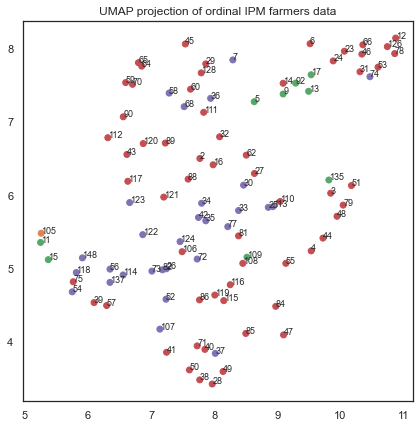

In [19]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="euclidean", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of ordinal IPM farmers data')

### Nominal features

/Users/mmarzi/opt/anaconda3/envs/ipm/lib/python3.9/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


Text(0.5, 1.0, 'UMAP projection of nominal IPM farmers data')

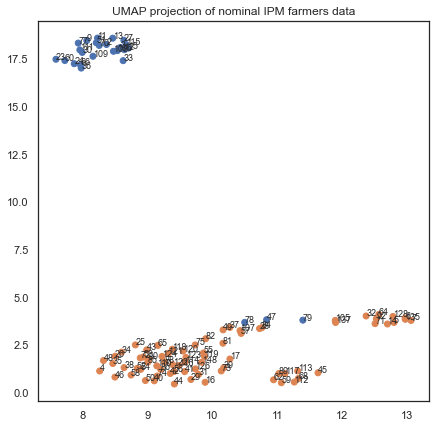

In [20]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="hamming", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN["Already_used_DSS"]])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of nominal IPM farmers data')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [22]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

Text(0.5, 1.0, 'UMAP projection of IPM farmers intersection data')

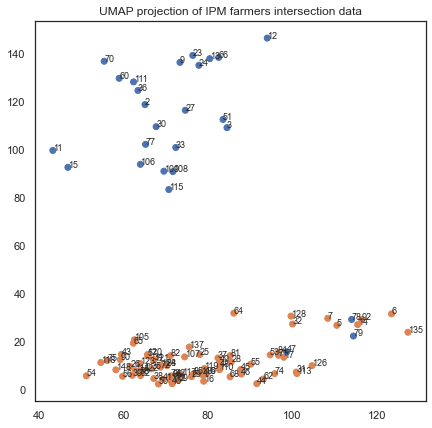

In [23]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'UMAP projection of IPM farmers union data')

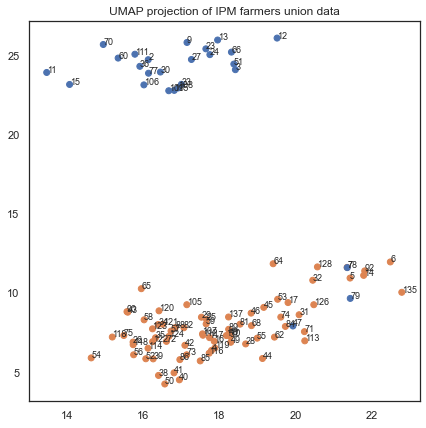

In [24]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers union data')

# CLUSTERING

Probaj clustering brez dim reduction

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers intersection data')

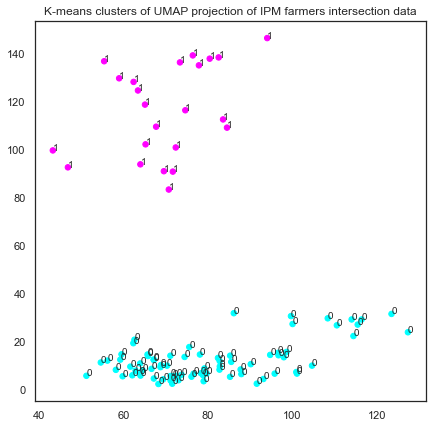

In [25]:
# k-means clustering 2D intersection emnbedding
km_inters_clusters = cluster.KMeans(n_clusters=2).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=km_inters_clusters, s=30, cmap='cool')

# Add cluster text
for i, val in enumerate(km_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)
plt.title('K-means clusters of UMAP projection of IPM farmers intersection data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers intersection data')

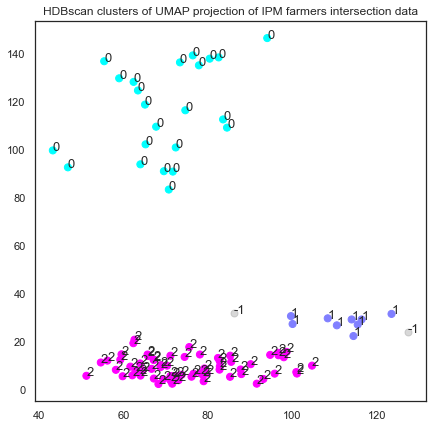

In [28]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=2)
hdbscan_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_inters_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers union data')

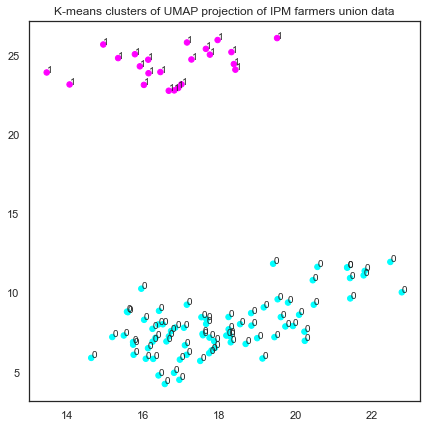

In [48]:
# kmeans clustering 2D union emnbedding
km_2D_union_clusters = cluster.KMeans(n_clusters=2).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_2D_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

plt.title('K-means clusters of UMAP projection of IPM farmers union data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers union data')

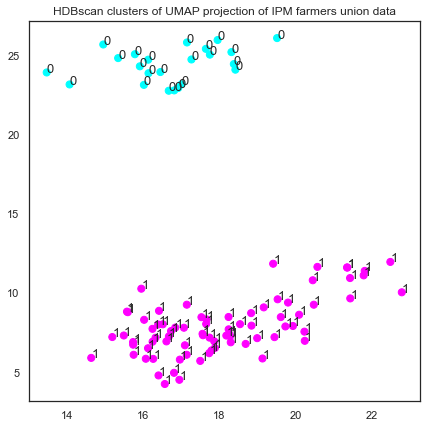

In [49]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_2D_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_2D_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers union data')

In [50]:
hdbscan_2D_union_clusters

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Interactive 3D Visualisation

In [43]:
# 3D embedding
ord_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="manhattan", random_state=123)
ord_embedding3d = ord_reducer3d.fit_transform(ordnum_df)

nom_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="dice", random_state=123)
nom_embedding3d = nom_reducer3d.fit_transform(nom_df)

# combine mappings
intersection_embedding3d = nom_embedding3d * ord_embedding3d
union_embedding3d = nom_embedding3d + ord_embedding3d

# hdbscan
intersection_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(intersection_embedding3d)
union_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(union_embedding3d)
print("intersection_clusters :", intersection_clusters)
print("union_clusters :", union_clusters)

/Users/mmarzi/opt/anaconda3/envs/ipm/lib/python3.9/site-packages/umap/umap_.py:1760: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



intersection_clusters : [1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0]
union_clusters : [0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1]


### Plotly visualisation

In [44]:
# 3D dataframes
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

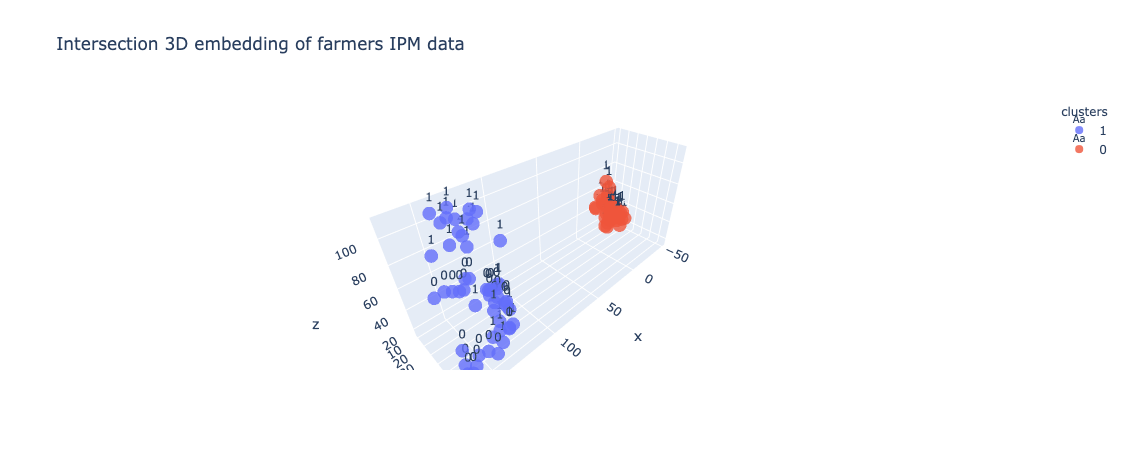

In [45]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", text=df_noNaN["Already_used_DSS"], opacity=0.8, 
                    title="Intersection 3D embedding of farmers IPM data")
fig.show()

In [46]:
fig.write_html("IPM_DataEmbedding_q1.html")

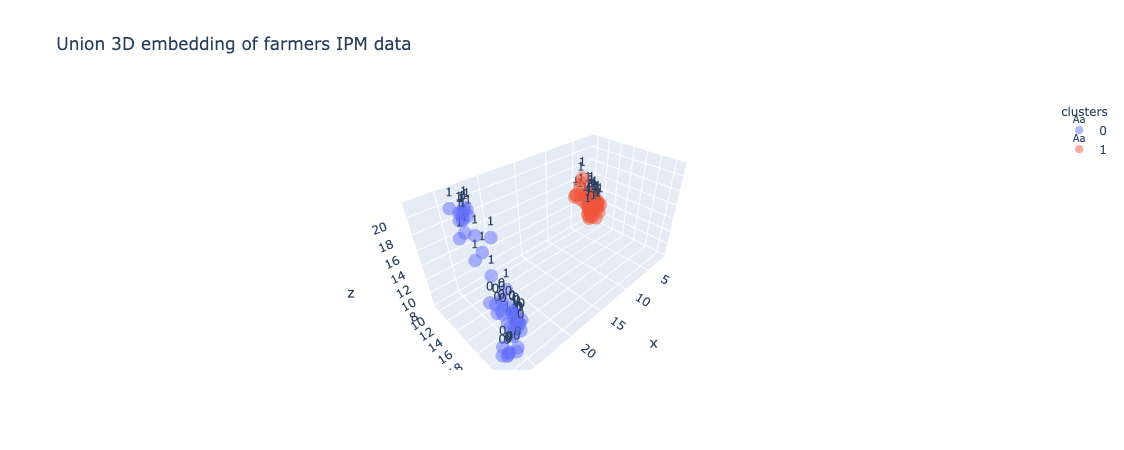

In [47]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["Already_used_DSS"], opacity=0.5, 
                    title="Union 3D embedding of farmers IPM data")
fig.write_html("output/IPM_Q1.html")
fig.show()

# Cluster explanation 

In [62]:
# DataFrame for classification with clusters from embedding3d
df_noNaN["clusters"] = hdbscan_2D_union_clusters
df_clst = df_noNaN.copy()

In [63]:
df_clst.to_csv("IPM_data&clusters_question1.csv", sep=",", na_rep="?", index=False)

## Modelling

In [ ]:
from sklearn import tree

target_class = "clusters"
X, y = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]], df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(_) for _ in [0,1,2,3]], filled=True) 

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_class = "clusters"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
y = df_noNaN[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# Predictions for test dataset
y_predict = model.predict(X_test)
y_predict

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = clf.fit(X, Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

In [ ]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [ ]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})